In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## SET THE COLOR THEME FOR SEABORN
sns.set_theme(color_codes=True)

# PANDAS DATA FRAME TO DISPLAY ALL COLUMNS
pd.set_option('display.max_columns',None)
# PANDAS DATA FRAME WITH 2 DECMIMAL PLACES
pd.set_option('display.float_format', lambda x: '%.2f' % x)


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_predict

In [8]:
# READ THE CSV FILE INTO DATAFRAME
df = pd.read_csv('ToyotaCorolla.csv', encoding='unicode_escape')

In [ ]:
df.head()

In [13]:
filtered_df = df.filter(['Price','Age_08_04','Mfg_Month','Mfg_Year','KM'])

In [14]:
filtered_df

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM
0,13500,23,10,2002,46986
1,13750,23,10,2002,72937
2,13950,24,9,2002,41711
3,14950,26,7,2002,48000
4,13750,30,3,2002,38500
...,...,...,...,...,...
1431,7500,69,12,1998,20544
1432,10845,72,9,1998,19000
1433,8500,71,10,1998,17016
1434,7250,70,11,1998,16916


In [20]:
X = filtered_df[['Price']]
y = filtered_df[['KM']]

In [25]:
reg_model = LinearRegression().fit(X,y)

In [26]:
constant = reg_model.intercept_[0] ## intercept is referred as constant

In [27]:
w = reg_model.coef_[0][0] # value of w

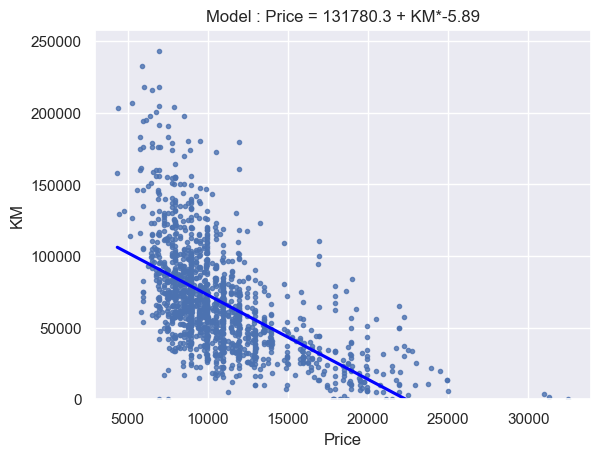

In [32]:
# ci --> confident information level is False
g = sns.regplot(x=X, y=y, scatter_kws={'color': 'b', 's':9}, ci=False, color='blue')

# constant of the regression model is taken (constant) + 0th cofficent from the regression model (w)
g.set_title(f"Model : Price = {round(constant,2)} + KM*{round(w,2)}")

plt.ylim(bottom=0)
plt.show()


In [33]:
## CALCULATE THE MEAN SQUARE ERROR
y_pred = reg_model.predict(X)
mean_squared_error(y, y_pred)

949088420.9038951

In [34]:
y.mean() ## MEAN VALUE OF y

KM   68533.26
dtype: float64

In [35]:
y.std() ## STANDARD DEVIATION OF Y

KM   37506.45
dtype: float64

In [36]:
np.sqrt(mean_squared_error(y, y_pred))

30807.278700071758

In [37]:
mean_absolute_error(y, y_pred)

23085.338288141935

In [38]:
reg_model.score(X,y)

0.3248545891553044